### ЗАГРУЗКА БИБЛИОТЕК

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import datetime
import plotly.express as px

In [6]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
!pip install openpyxl

You should consider upgrading via the 'C:\Users\HONOR\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### ОТКРЫТИЕ ФАЙЛА И ПЕРВИЧНЫЙ АНАЛИЗ

In [8]:
n = pd.read_excel("NetflixOriginals.xlsx")
n

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [9]:
n.dtypes

Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object

In [10]:
net = n.rename({'IMDB Score': 'IMDB'}, axis=1)  

In [11]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     584 non-null    object 
 1   Genre     584 non-null    object 
 2   Premiere  584 non-null    object 
 3   Runtime   584 non-null    int64  
 4   IMDB      584 non-null    float64
 5   Language  584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


# 1. Фильмы какого жанра наиболее популярные? А какого менее?

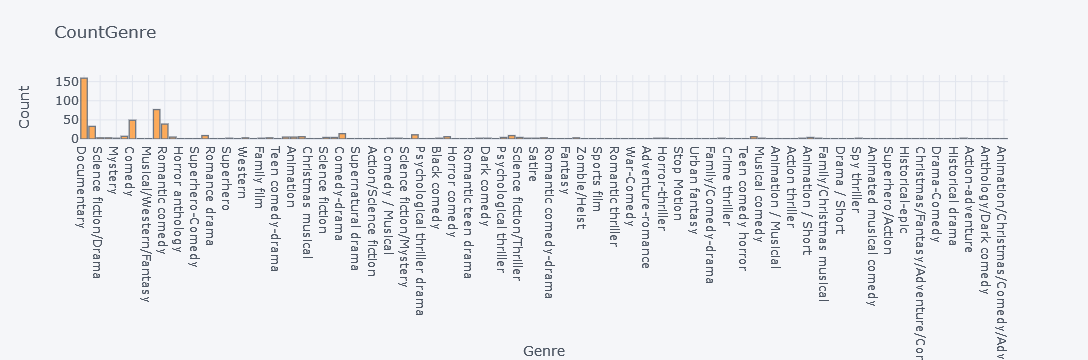

In [12]:
net['Genre'].iplot(kind='hist',xTitle='Genre', yTitle='Count', title='CountGenre')

Самые популярные фильмы - документальные 


In [13]:
net.Genre.value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

Самый не популярный - Horror anthology. Думаю, что это самый логичный вывод, потому что те, которые стоят через слеш будут перекликаться с другими фильмами и тогда жанр не будет самым не популярным. 


# 2. На каком языке Netflix чаще всего снимает фильмы?

In [14]:
net.Language.value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georgian      

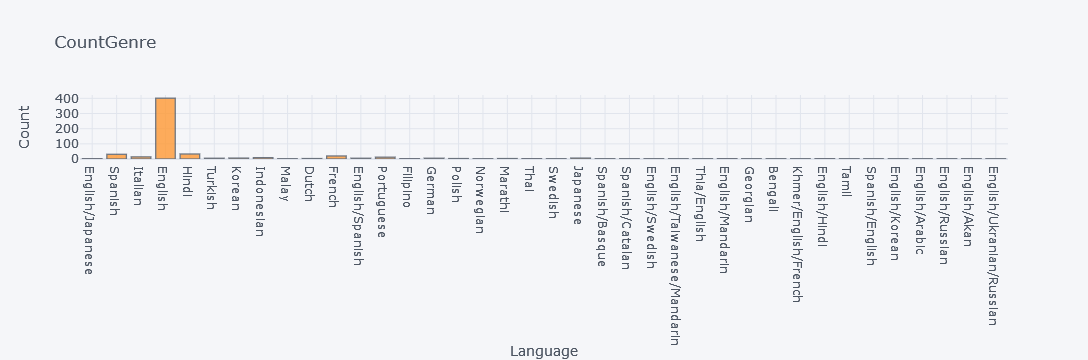

In [15]:
net['Language'].iplot(kind='hist',xTitle='Language', yTitle='Count', title='CountGenre')

# 3. Есть ли зависимость между длительностью фильма и его рейтингом?

In [16]:
net

,Title,Genre,Premiere,Runtime,IMDB,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [17]:
sns.set_theme(color_codes=True)

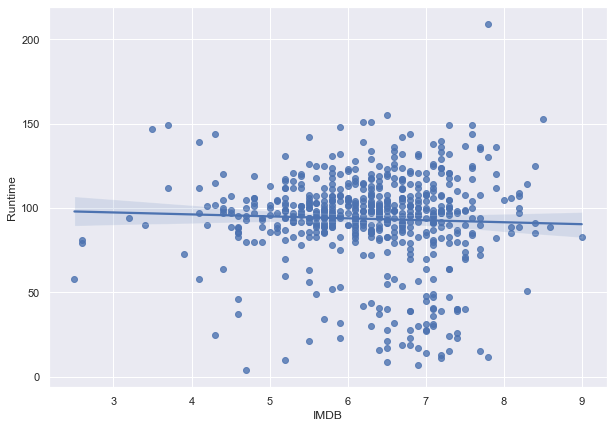

In [18]:
f, ax = plt.subplots(figsize=(10, 7))
sns.regplot(x="IMDB", y="Runtime", data=net, ax=ax);

In [19]:
x = net['Runtime']
y = net['IMDB']
corr_result=np.corrcoef(x, y) 
print(corr_result)

[[ 1.         -0.04089629]
 [-0.04089629  1.        ]]


In [20]:
Runtime = net["Runtime"].to_numpy()
IMDB = net["IMDB"].to_numpy()
scipy.stats.pearsonr(Runtime, IMDB)[0]

-0.04089629142078869

Судя по графику и корреляционной матрице, можно сделать вывод, что нет зависимости между длительностью и оценкой

# 4. На какой месяц назначать фильм? Почему?

In [21]:
net['Premiere'] = pd.to_datetime(net['Premiere'], format="%m/%d/%y", infer_datetime_format=True)

In [22]:
day_of_month_net = net['Premiere'].dt.day
day_of_month_net.head()

0     5
1    21
2    26
3    19
4    30
Name: Premiere, dtype: int64

C:\Users\HONOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Premiere'>

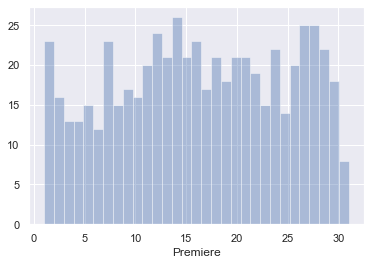

In [23]:
day_of_month_тnet = day_of_month_net.dropna()
sns.distplot(day_of_month_net, kde=False, bins=31)

# Сделано,чтобы проверить на наличие верного парсинга дат. На вид все верно

In [24]:
net = net.sort_values(by='Premiere', ascending=True)

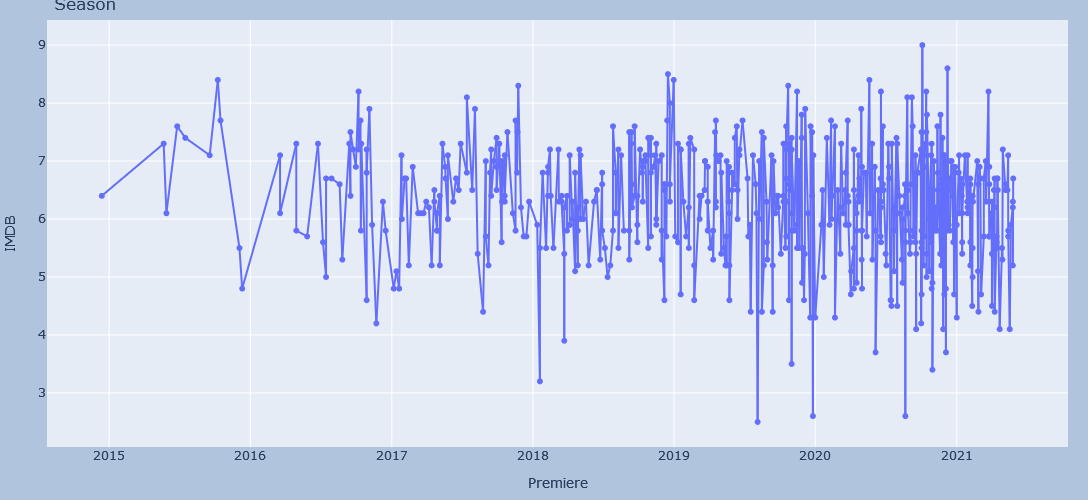

In [25]:
fig = px.line(net, x='Premiere', y='IMDB', title = 'Season', markers=True, width=1000, height=500)
fig.update_traces(textposition="bottom right")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [26]:
rslt_df = net[net['IMDB']>6.3]
rslt_df

,Title,Genre,Premiere,Runtime,IMDB,Language
304,My Own Man,Documentary,2014-12-13,81,6.4,English
519,The Other One: The Long Strange Trip of Bob Weir,Documentary,2015-05-22,83,7.3,English
550,"What Happened, Miss Simone?",Documentary,2015-06-26,84,7.6,English
531,Tig,Documentary,2015-07-17,80,7.4,English
465,Keith Richards: Under the Influence,Documentary,2015-09-18,81,7.1,English
...,...,...,...,...,...,...
354,Milestone,Drama,2021-05-07,98,6.6,Hindi
336,Monster,Drama,2021-05-07,98,6.5,English
340,Oxygen,Science fiction thriller,2021-05-12,101,6.5,French
461,Ferry,Crime drama,2021-05-14,106,7.1,Dutch


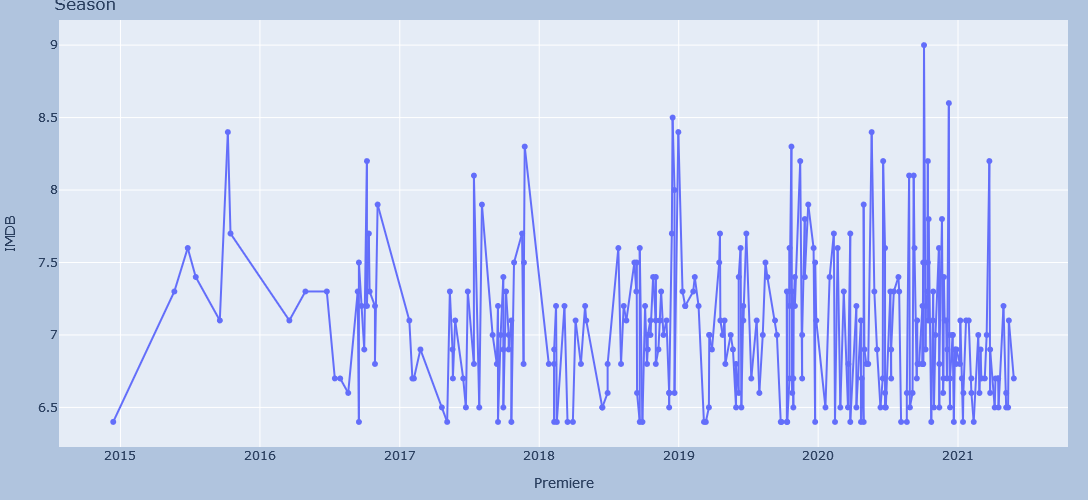

In [27]:
fig = px.line(rslt_df, x='Premiere', y='IMDB', title = 'Season', markers=True, width=1000, height=500)
fig.update_traces(textposition="bottom right")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [28]:
rslt_doc = net[net['Genre'] == 'Documentary']
rslt_doc

,Title,Genre,Premiere,Runtime,IMDB,Language
304,My Own Man,Documentary,2014-12-13,81,6.4,English
519,The Other One: The Long Strange Trip of Bob Weir,Documentary,2015-05-22,83,7.3,English
228,Hot Girls Wanted,Documentary,2015-05-29,84,6.1,English
550,"What Happened, Miss Simone?",Documentary,2015-06-26,84,7.6,English
531,Tig,Documentary,2015-07-17,80,7.4,English
...,...,...,...,...,...,...
329,Dolly Parton: A MusiCares Tribute,Documentary,2021-04-07,55,6.5,English
140,Why Did You Kill Me?,Documentary,2021-04-14,83,5.6,English
326,Chadwick Boseman: Portrait of an Artist,Documentary,2021-04-17,21,6.5,English
10,Searching for Sheela,Documentary,2021-04-22,58,4.1,English


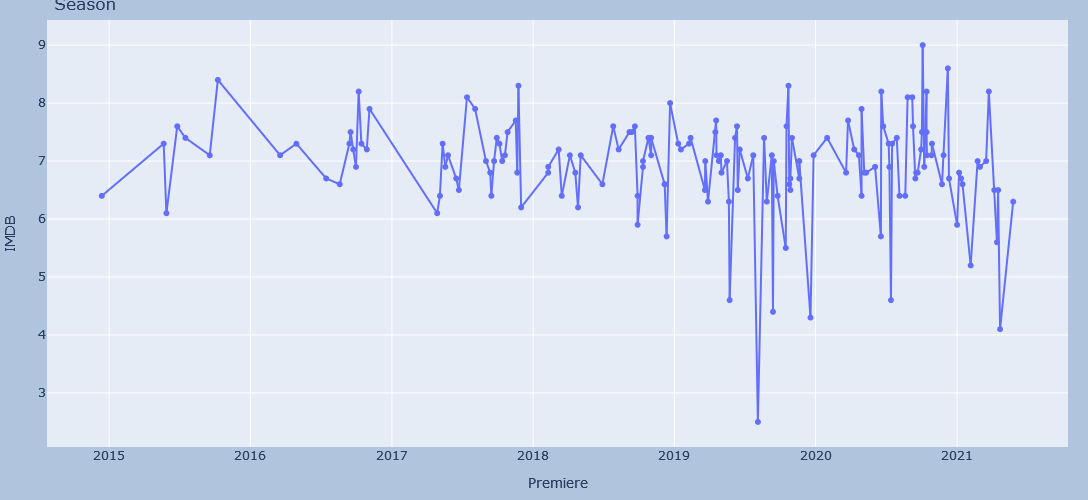

In [29]:
fig = px.line(rslt_doc, x='Premiere', y='IMDB', title = 'Season', markers=True, width=1000, height=500)
fig.update_traces(textposition="bottom right")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

### БИБЛИОТЕКИ ДЛЯ МАТЕМАТИЧЕСКИХ РАСЧЕТОВ

In [31]:
from statistics import mean
import statistics 
import statsmodels.formula.api as sm
import numpy as np
import scipy as stats
from scipy.stats import norm
from scipy import stats
import numpy as np
from math import *

# Просчет доверительного интервала для оценки фильма

In [32]:
x = net['IMDB']
list_avg = mean(x)
print("Average value of the list:\n")
print(list_avg)
 

Average value of the list:

6.2717465753424655


In [33]:
x = net['IMDB']
res_std = statistics.stdev(x)
print(res_std)


0.9792563938488796


In [34]:
numpy = net["IMDB"].to_numpy()
res_std = np.std(numpy)
print(res_std)

0.9784176301884663


In [35]:
N = 584


In [36]:
stats.norm.interval(0.97, loc=list_avg, scale=res_std/sqrt(N))

(6.183885671346442, 6.359607479338489)

# Я думаю, что можно сказать о том, что фильм выпускать в октябре, опираясь на оценки и на график времени. Если делать чуть шире, то можно получить 3 месяца, где будет октябрь, ноябрь и декабрь. В эти месяца больше всего фильмов, которые набрали хорошие оценки